<a href="https://colab.research.google.com/github/leviii008/CMP7239/blob/main/atif_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve
)

In [8]:
# Load dataset
df = pd.read_csv("/content/Spam Detection .csv")  # adjust path as needed
df.rename(columns={df.columns[-1]: 'label'}, inplace=True)

In [9]:
#Basic info
print("Dataset Shape:", df.shape)
print(df.head())
print("\nMissing values:", df.isnull().sum().sum())

Dataset Shape: (4601, 58)
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...      

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(df.drop('label', axis=1))


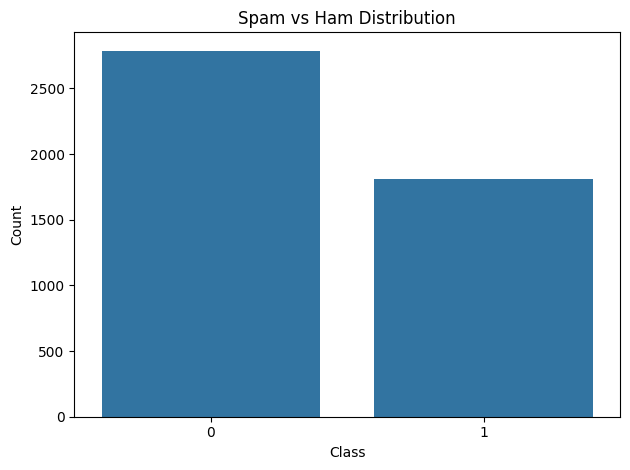

In [11]:
#Class distribution
sns.countplot(x='label', data=df)
plt.title('Spam vs Ham Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

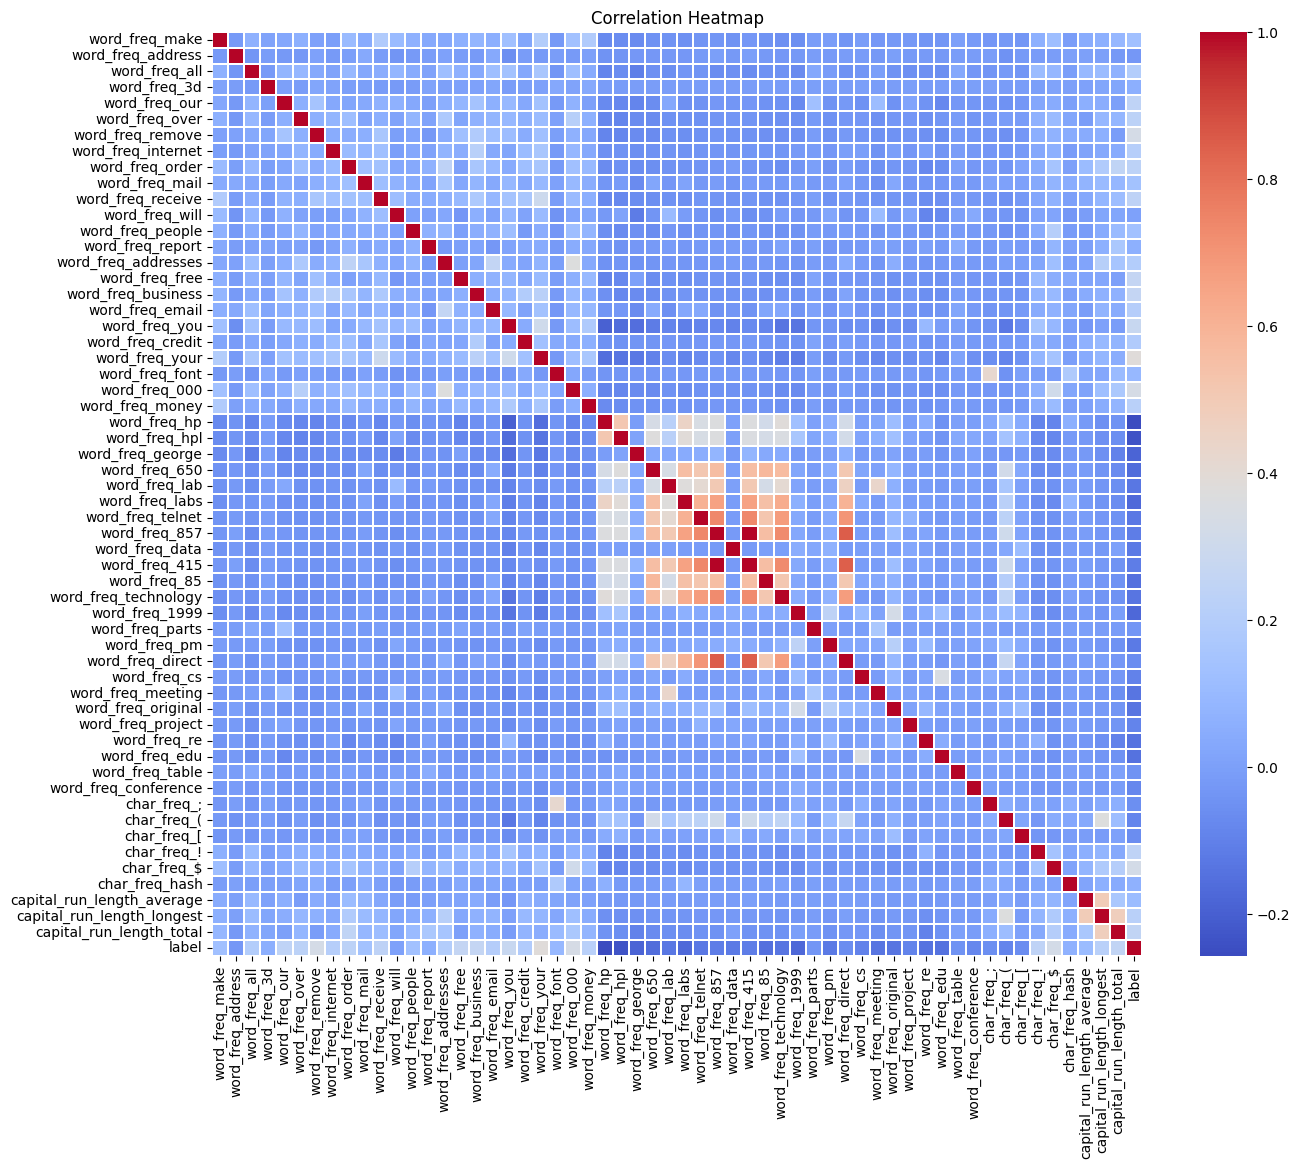

In [12]:
#Correlation heatmap
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.1)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
#Skewed features
print("\nTop 10 Skewed Features:")
print(df.drop('label', axis=1).skew().sort_values(ascending=False).head(10))


Top 10 Skewed Features:
char_freq_hash                31.062064
capital_run_length_longest    30.764993
word_freq_parts               28.263216
word_freq_3d                  26.227744
capital_run_length_average    23.761923
char_freq_[                   21.083545
word_freq_table               19.867691
word_freq_conference          19.720446
word_freq_project             18.771515
char_freq_!                   18.658004
dtype: float64


In [14]:
#Normalize features
features = df.drop('label', axis=1)
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['label'] = df['label']

In [15]:
#Split data
X = df_scaled.drop('label', axis=1)
y = df_scaled['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [16]:
#Train models
# 1. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
nb_probs = nb_model.predict_proba(X_test)[:, 1]

# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# 3. SVM with probability
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_probs = svm_model.predict_proba(X_test)[:, 1]

In [17]:
#Evaluation Summary
summary = pd.DataFrame({
    "Model": ["Naive Bayes", "Random Forest", "SVM"],
    "Accuracy": [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm)],
    "Precision": [precision_score(y_test, y_pred_nb), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_svm)],
    "Recall": [recall_score(y_test, y_pred_nb), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_svm)],
    "F1 Score": [f1_score(y_test, y_pred_nb), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_svm)],
    "ROC AUC": [roc_auc_score(y_test, nb_probs), roc_auc_score(y_test, rf_probs), roc_auc_score(y_test, svm_probs)]
})
print("\n📊 Model Evaluation Summary:")
print(summary)


📊 Model Evaluation Summary:
           Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0    Naive Bayes  0.819696   0.700136  0.948529  0.805621  0.915675
1  Random Forest  0.955829   0.958254  0.928309  0.943044  0.985931
2            SVM  0.899348   0.910751  0.825368  0.865959  0.956431


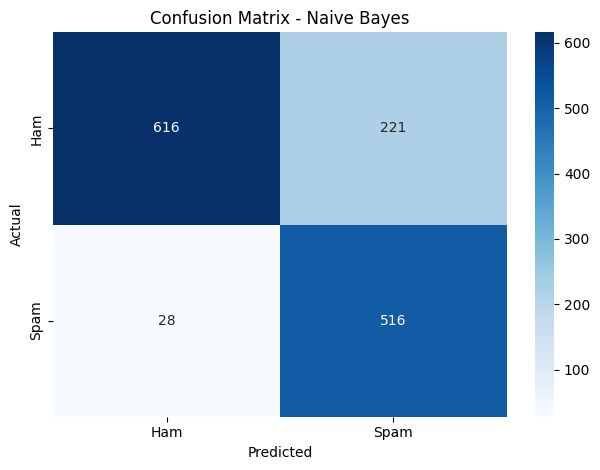

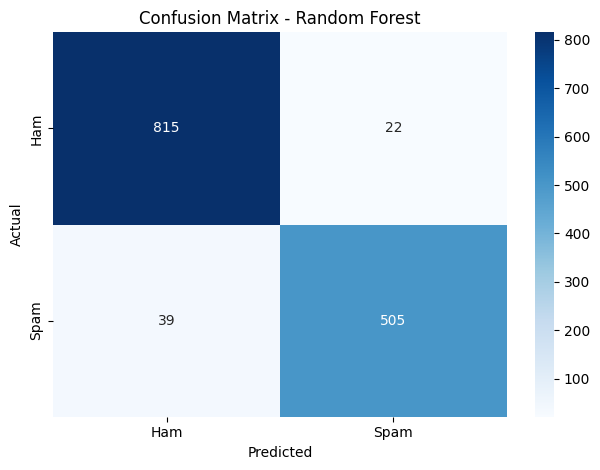

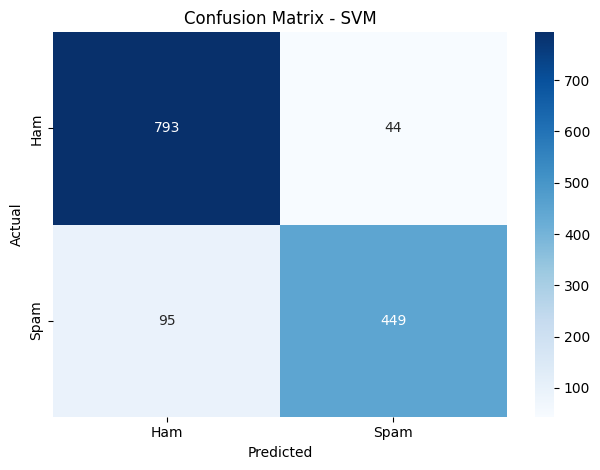

In [18]:
#Confusion Matrices
def plot_cm(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

plot_cm(y_test, y_pred_nb, "Naive Bayes")
plot_cm(y_test, y_pred_rf, "Random Forest")
plot_cm(y_test, y_pred_svm, "SVM")

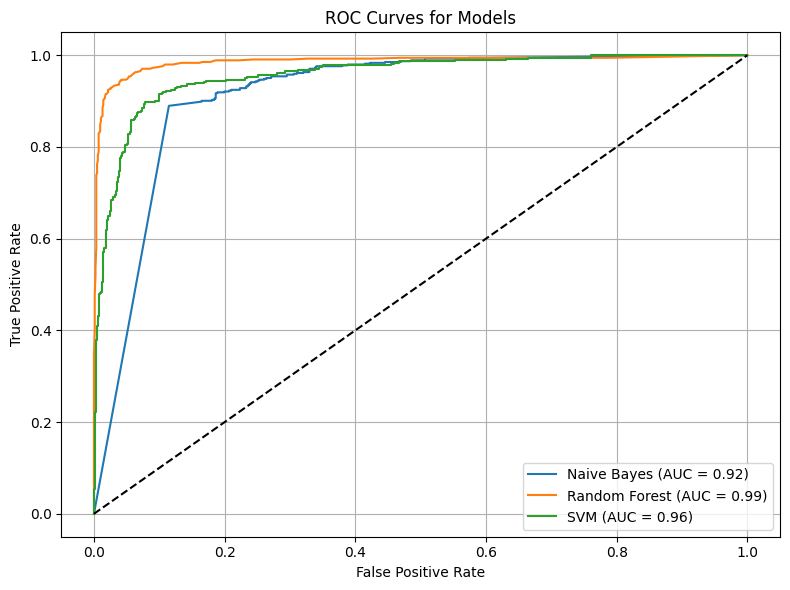

In [19]:
#ROC Curves
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_score(y_test, nb_probs):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_probs):.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_score(y_test, svm_probs):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
#Cross-Validation (5-fold)
cv_nb = cross_val_score(nb_model, X, y, cv=5)
cv_rf = cross_val_score(rf_model, X, y, cv=5)
cv_svm = cross_val_score(svm_model, X, y, cv=5)

print("\n🧪 5-Fold Cross-Validation Scores:")
print(f"Naive Bayes: {cv_nb.mean():.4f}")
print(f"Random Forest: {cv_rf.mean():.4f}")
print(f"SVM: {cv_svm.mean():.4f}")



🧪 5-Fold Cross-Validation Scores:
Naive Bayes: 0.8222
Random Forest: 0.9285
SVM: 0.8824


In [21]:
#Hyperparameter Tuning
# Random Forest
param_grid_rf = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3)
grid_rf.fit(X_train, y_train)
print("\nBest RF Parameters:", grid_rf.best_params_)

# SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=3)
grid_svm.fit(X_train, y_train)
print("Best SVM Parameters:", grid_svm.best_params_)


Best RF Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best SVM Parameters: {'C': 1, 'kernel': 'rbf'}
